## Датасет собран из базы данных переписи 1994 года и содержит данные о доходах.
### Информация о данных:
* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, * Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* salary: >50K,<=50K

## Проведите анализ данных при помощи Pandas выполнив поставленные задачи.
#### 

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
# загружаем датасет
data = pd.read_csv("./data/adult.data.csv")
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Датасет выглдяит чистым, null values отсутствуют

**1. Посчитайте, сколько мужчин и женщин (признак *sex*) представлено в этом датасете**

In [58]:
count_man = len(data[data["sex"] == "Male"])
count_woman= len(data[data["sex"] == "Female"])
print(count_man)
print(count_woman)

21790
10771


**2. Каков средний возраст мужчин (признак *age*) по всему датасету?**

In [59]:
avg_male_age = data[data["sex"] == "Male"]["age"].mean()
round(float(avg_male_age), 1)

39.4

**3. Какова доля граждан Соединенных Штатов (признак *native-country*)?**

In [60]:
us_citizenship_percent = len(data[data["native-country"] == "United-States"]) / len(data)
round(us_citizenship_percent * 100, 2)

89.59

**4-5. Рассчитайте среднее значение и среднеквадратичное отклонение возраста тех, кто получает более 50K в год (признак *salary*) и тех, кто получает менее 50K в год**

  salary       mean        std
0  <=50K  36.783738  14.020088
1   >50K  44.249841  10.519028


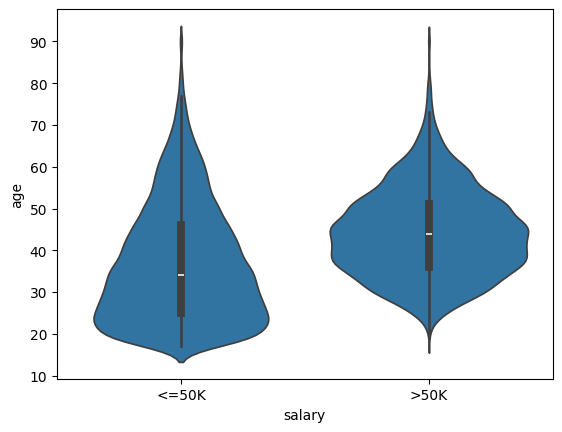

In [61]:
age_salary = data.groupby("salary")["age"].agg(["mean", "std"]).reset_index()

print(age_salary)

sns.violinplot(data=data, x="salary", y="age")
plt.show()

**6. Правда ли, что люди, которые получают больше 50k, имеют минимум высшее образование? (признак *education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* или *Doctorate*)**

In [62]:
high_salary = data[data["salary"] == ">50K"]

In [63]:
high_salary["education"].unique()

array(['HS-grad', 'Masters', 'Bachelors', 'Some-college', 'Assoc-voc',
       'Doctorate', 'Prof-school', 'Assoc-acdm', '7th-8th', '12th',
       '10th', '11th', '9th', '5th-6th', '1st-4th'], dtype=object)

Нет, неправда. Есть те, у кого образовние 7-8 классов


In [64]:
good_education = ["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]
high_salary_educated = len(high_salary[high_salary["education"].isin(good_education)])

print(f"Percent of people wiht higher education among people who's salary is >50K: {high_salary_educated/ len(high_salary) * 100}")

Percent of people wiht higher education among people who's salary is >50K: 57.83701058538452


In [65]:
len(high_salary[high_salary["education-num"] > 10])  / len(high_salary) * 100

57.83701058538452

Можно сделать вывод, что высшее образование не сильно влияет на высокую зарплату

**7. Выведите статистику возраста для каждой расы (признак *race*) и каждого пола. Используйте *groupby* и *describe*. Найдите таким образом максимальный возраст мужчин расы *Asian-Pac-Islander*.**

In [66]:
data.groupby(["race"])["age"].describe().reset_index()

,race,count,mean,std,min,25%,50%,75%,max
0,Amer-Indian-Eskimo,311.0,37.173633,12.447130,17.0,28.0,35.0,45.5,82.0
1,Asian-Pac-Islander,1039.0,37.746872,12.825133,17.0,28.0,36.0,45.0,90.0
2,Black,3124.0,37.767926,12.759290,17.0,28.0,36.0,46.0,90.0
3,Other,271.0,33.457565,11.538865,17.0,25.0,31.0,41.0,77.0
4,White,27816.0,38.769881,13.782306,17.0,28.0,37.0,48.0,90.0


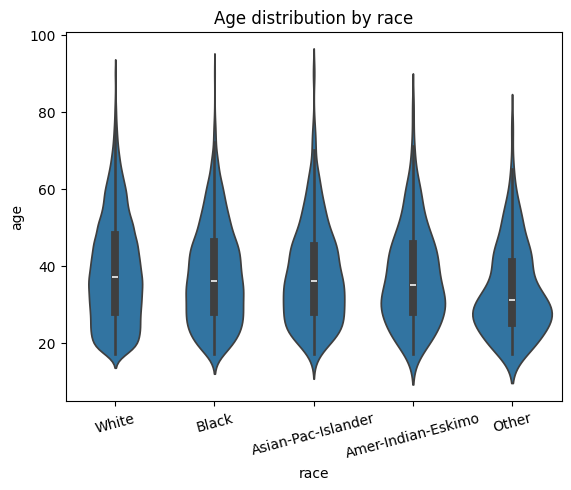

In [67]:
sns.violinplot(x='race', y='age', data=data)
plt.xticks(rotation  = 15)
plt.title("Age distribution by race")
plt.show()

**8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак *marital-status*)? Женатыми считаем тех, у кого *marital-status* начинается с *Married* (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.**

In [68]:
rich_man = data[(data["salary"] == ">50K") & (data["sex"] == "Male") ]
married_rich_man = rich_man[rich_man["marital-status"].str.startswith("Married")]
print(len(married_rich_man))
print(len(rich_man) - len(married_rich_man))

5965
697


In [69]:
data['is_married'] = data['marital-status'].str.startswith('Married')
marriage_salary_analysis = data[data['sex'] == 'Male'].groupby('is_married')['salary'].apply(
    lambda x: (x == '>50K').mean() * 100
).reset_index()
marriage_salary_analysis

,is_married,salary
0,False,8.449509
1,True,44.051399


In [70]:
data["high_salary"] = (data["salary"] == '>50K').astype(int)
marriage_salary_analysis = data[data['sex'] == "Male"].groupby("is_married")["high_salary"].mean().reset_index()
marriage_salary_analysis

,is_married,high_salary
0,False,0.084495
1,True,0.440514


Среди женатых

**9. Какое максимальное число часов человек работает в неделю (признак *hours-per-week*)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

In [71]:
max_work_hrs = data["hours-per-week"].max()
most_hardworking_people = data[data["hours-per-week"] == max_work_hrs]
print(f"Number of people working maximum number of hours ({max_work_hrs}hrs) is {len(most_hardworking_people)}")

rich_most_hardworking_people = most_hardworking_people[most_hardworking_people["salary"] == ">50K"]
print(len(rich_most_hardworking_people) / len(most_hardworking_people) * 100, "% of most hardworing people earn > 50K")

Number of people working maximum number of hours (99hrs) is 85
29.411764705882355 % of most hardworing people earn > 50K


**10. Посчитайте среднее время работы (*hours-per-week*) зарабатывающих мало и много (*salary*) для каждой страны (*native-country*).**

In [72]:
rich_avg_work_hours = data[data["salary"] == ">50K"].groupby("native-country")["hours-per-week"].mean().reset_index()
poor_avg_work_hours = data[data["salary"] == "<=50K"].groupby("native-country")["hours-per-week"].mean().reset_index()

print(pd.merge(rich_avg_work_hours, poor_avg_work_hours , on = "native-country").head(10))

       native-country  hours-per-week_x  hours-per-week_y
0                   ?         45.547945         40.164760
1            Cambodia         40.000000         41.416667
2              Canada         45.641026         37.914634
3               China         38.900000         37.381818
4            Columbia         50.000000         38.684211
5                Cuba         42.440000         37.985714
6  Dominican-Republic         47.000000         42.338235
7             Ecuador         48.750000         38.041667
8         El-Salvador         45.000000         36.030928
9             England         44.533333         40.483333


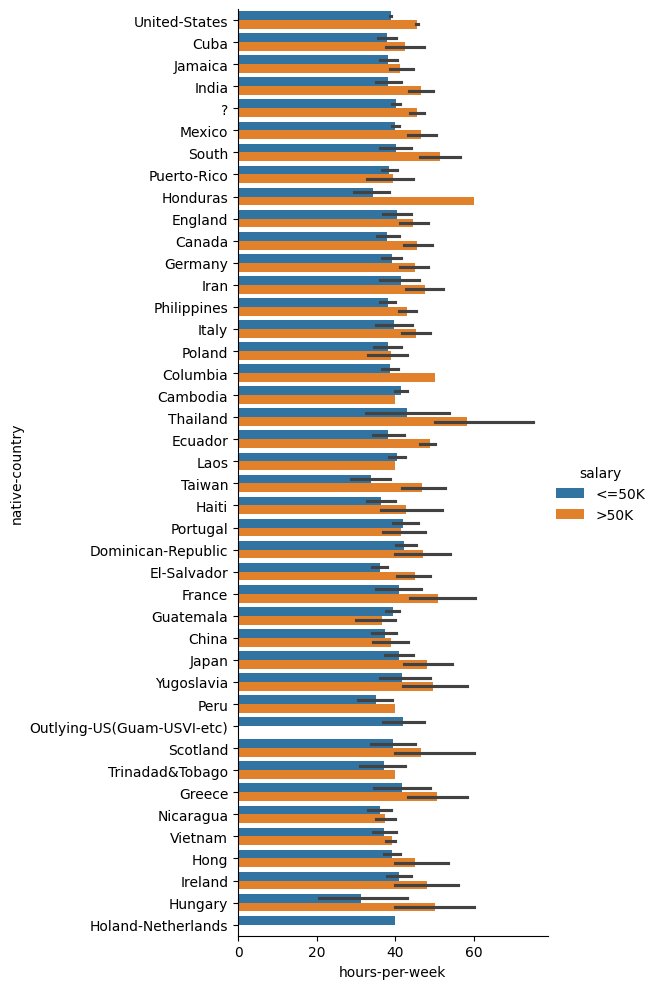

In [73]:
sns.catplot(
    data=data, 
    kind = "bar",
    x = "hours-per-week", 
    y = "native-country",
    hue = "salary",
    height = 10, aspect = 0.6         
)

plt.show()


**11.Сгруппируйте людей по возрастным группам *young*, *adult*, *retiree*, где:**
* *young* соответствует 16-35 лет
* *adult* - 35-70 лет
* *retiree* - 70-100 лет

**Проставьте название соответсвтуещей группы для каждого человека в новой колонке AgeGroup**

In [74]:
def split_by_age(age):
    if age < 16 or age > 100:
        return "undefined"
    if age > 70:
        return "retiree"
    elif age > 35:
        return "adult"
    else:
        return "young"
    
data["AgeGroup"] = data["age"].apply(split_by_age)

**12-13. Определите количество зарабатывающих >50K в каждой из возрастных групп (колонка AgeGroup), а также выведите название возрастной группы, в которой чаще зарабатывают больше 50К (>50K)**

In [75]:
data.groupby(["AgeGroup", "salary"])["workclass"].count().reset_index().rename(columns={"workclass":"count"})

,AgeGroup,salary,count
0,adult,<=50K,11054
1,adult,>50K,6042
2,retiree,<=50K,446
3,retiree,>50K,94
4,young,<=50K,13220
5,young,>50K,1705


Чаще всего высокая ЗП у взрослых людей (AgeGroup = adult)

**14. Сгруппируйте людей по типу занятости (колонка occupation) и определите количество людей в каждой группе. После чего напишите функциюю фильтрации filter_func, которая будет возвращать только те группы, в которых средний возраст (колонка age) не больше 40 и в которых все работники отрабатывают более 5 часов в неделю (колонка hours-per-week)**

In [76]:
occupation_info = data.groupby("occupation").agg({
            "sex": "count",
            "age":"mean",
            "hours-per-week" : "min"
    }).reset_index().rename(columns={"sex":"count", "age":"avg_age", "hours-per-week":"min_hours"})
occupation_info

,occupation,count,avg_age,min_hours
0,?,1843,40.882800,1
1,Adm-clerical,3770,36.964456,1
2,Armed-Forces,9,30.222222,8
3,Craft-repair,4099,39.031471,1
4,Exec-managerial,4066,42.169208,1
5,Farming-fishing,994,41.211268,2
6,Handlers-cleaners,1370,32.165693,2
7,Machine-op-inspct,2002,37.715285,1
8,Other-service,3295,34.949621,1
9,Priv-house-serv,149,41.724832,4


# Improvements

### Age group using pd.cut

In [42]:
data["AgeGroup2"] = pd.cut(data["age"], [16, 35, 70, 100], labels = ["young", "adult", "retiree"])
data[["AgeGroup", "AgeGroup2"]].head(10)

,AgeGroup,AgeGroup2
0,adult,adult
1,adult,adult
2,adult,adult
3,adult,adult
4,young,young
5,adult,adult
6,adult,adult
7,adult,adult
8,young,young
9,adult,adult


## EDA

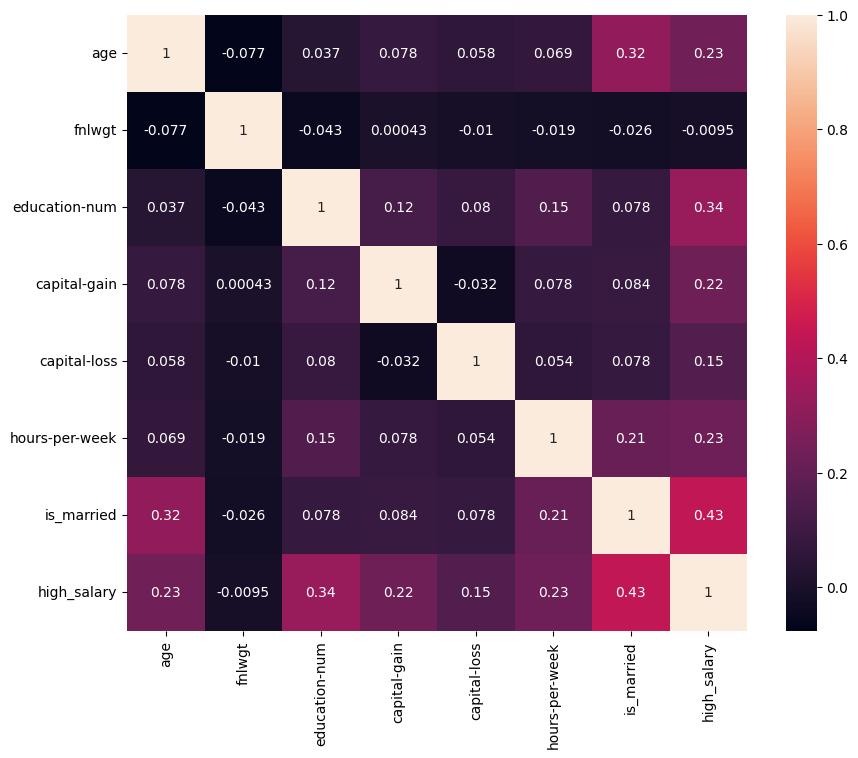

In [77]:
corr_matrix = data.corr(numeric_only=True)

plt.figure(figsize = (10, 8))
sns.heatmap(corr_matrix,  annot=True)
plt.show()

Interpretation of a heatmap:

we can see moderate correlation between marriege status and having high salary.
 Also there is slighly smaller correlation between having good education and having high salary

there is also a mid correlatin between being old and being married 

### T-test

**Firstly, let's consider type of a t-test.**

*One-sample, two-sample or paired t-test ?*

We will compare 2 groups (">50k" and "<=50K"), so two-sample test is our choice

*One-tailed or two-tailed ?*

We ask "Are mean ages differ for 2 groups" => we use two-tailed test

In [86]:
data.groupby("salary")["age"].count().reset_index()

,salary,age
0,<=50K,24720
1,>50K,7841


Group 1: people earning >50K

Group 2: people earning <=50K

---

h0: mean age is the same

h1: mean age differs

alpha = 0.05

---

We will use Welch's version of a test, bcs sample sizes differ significantly

In [ ]:
from scipy.stats import ttest_ind

high_salary_grp = data.loc[data["salary"] == ">50K", "age"]
low_salary_grp = data.loc[data["salary"] == "<=50K", "age"]

# We set equal_var = False to use Welch's verison of a test
stat, p_value = ttest_ind(high_salary_grp, low_salary_grp, equal_var=False)
print(stat, p_value)


50.264210024707836 0.0


p = 0.0 ; alpha = 0.5

p << alpha  => h0 is rejected

Conclusion: There is a significant difference in mean age between groups

### Detect outliers

In [87]:
data["hours-per-week"].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

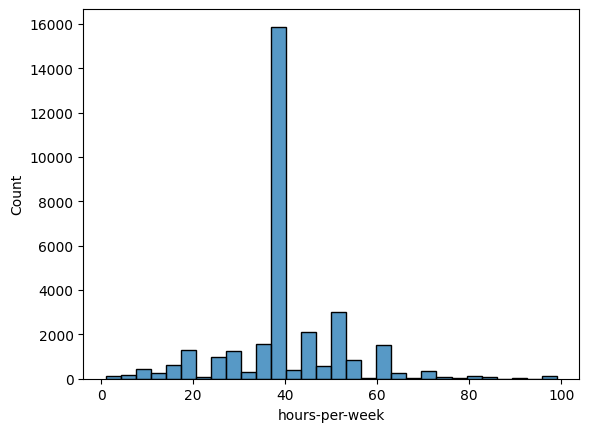

In [102]:
sns.histplot(data, bins = 30, x = "hours-per-week")
plt.show()

<Axes: xlabel='hours-per-week'>

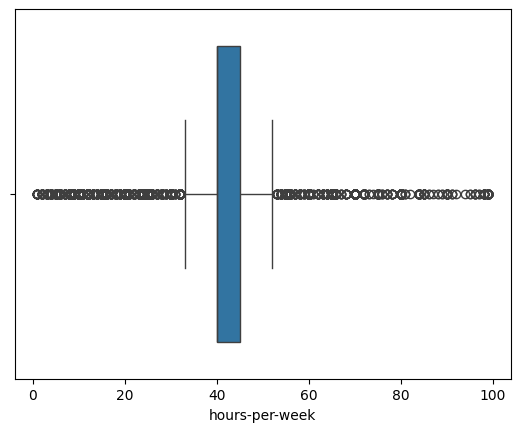

In [95]:
sns.boxplot(data, x = "hours-per-week")

just note for myself

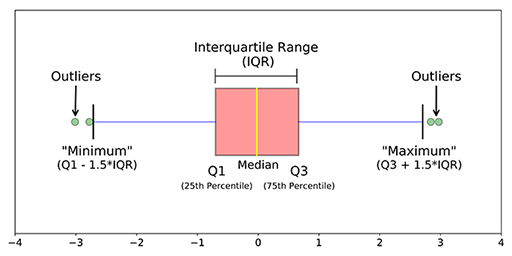


In [106]:
q1 = data["hours-per-week"].quantile(0.25)
q3 = data["hours-per-week"].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - iqr * 1.5
upper_bound = q3 + iqr * 1.5

print("Lower_bound ", lower_bound)
print("Upper bound ", upper_bound)
outliers = data[(data["hours-per-week"] < lower_bound) | (data["hours-per-week"] > upper_bound)]

len(outliers) / len(data) * 100


Lower_bound  32.5
Upper bound  52.5


27.664998003746817

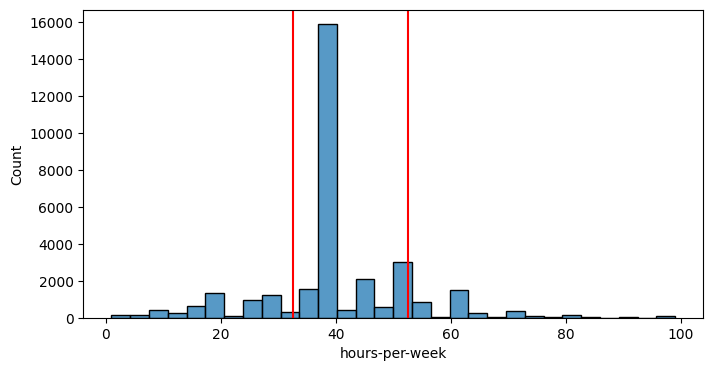

In [108]:
plt.figure(figsize=(8, 4))
sns.histplot(data, bins = 30, x = "hours-per-week")
plt.axvline(upper_bound, color = "red")
plt.axvline(lower_bound, color = "red")
plt.show()

In [116]:
outliers.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,high_salary
count,9008.000000,9.008000e+03,9008.000000,9008.000000,9008.000000,9008.000000,9008.000000
mean,37.883992,1.849977e+05,10.014210,1296.533970,85.244338,37.487900,0.203597
std,16.456536,1.057655e+05,2.650639,8898.352284,401.576927,22.292067,0.402695
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,23.000000,1.140552e+05,9.000000,0.000000,0.000000,20.000000,0.000000
50%,35.000000,1.749320e+05,10.000000,0.000000,0.000000,30.000000,0.000000
75%,49.000000,2.335165e+05,12.000000,0.000000,0.000000,60.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000
